## 주성분 분석

### 차원과 차원 축소
머신러닝에서는 특성을 차원(dimension)이라고 부릅니다.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법입니다.

대표적인 차원 축소 알고리즘으로는 주성분 분석(principal component analysis), 즉 PCA가 있습니다.

### 주성분 분석
가장 데이터의 분포를 가장 잘 표현하는 방향은 분산이 가장 큰 방향입니다.

이 벡터를 주성분(principal component)이라고 부릅니다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fruits = np.load('/Users/ujong-yun/Documents/GitHub/machinelearning-deeplearning/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #n_components 주성분의 개수 지정
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [5]:
def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, ax = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                ax[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
            ax[i, j].axis('off')
    plt.show()

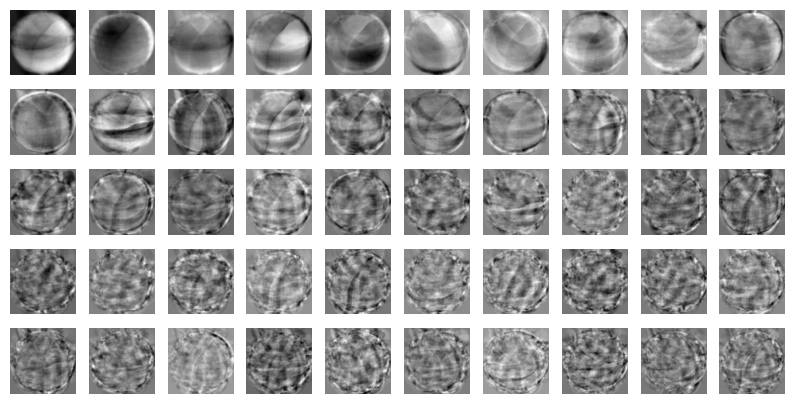

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


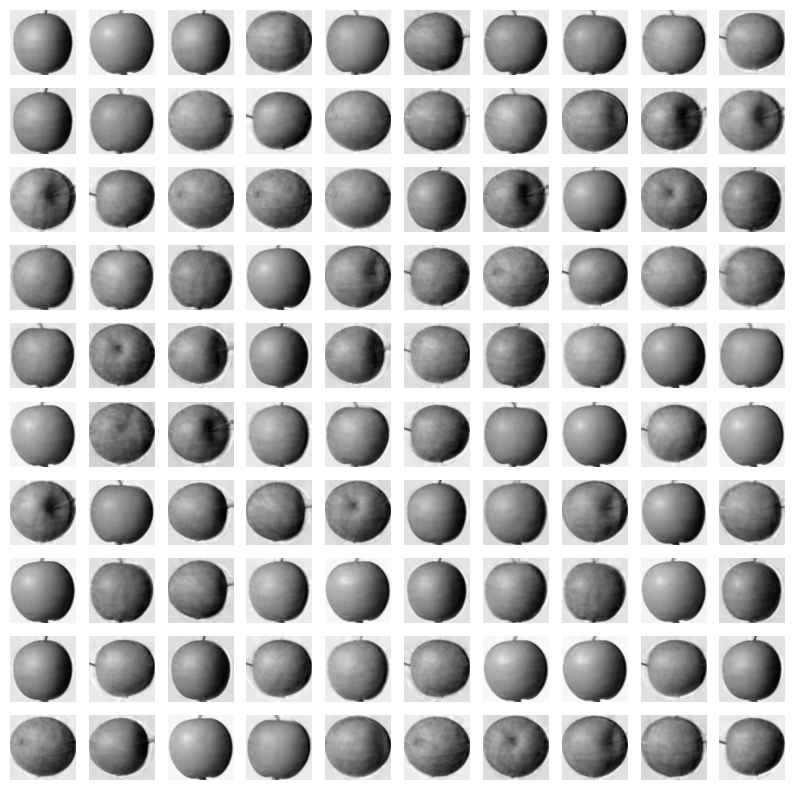

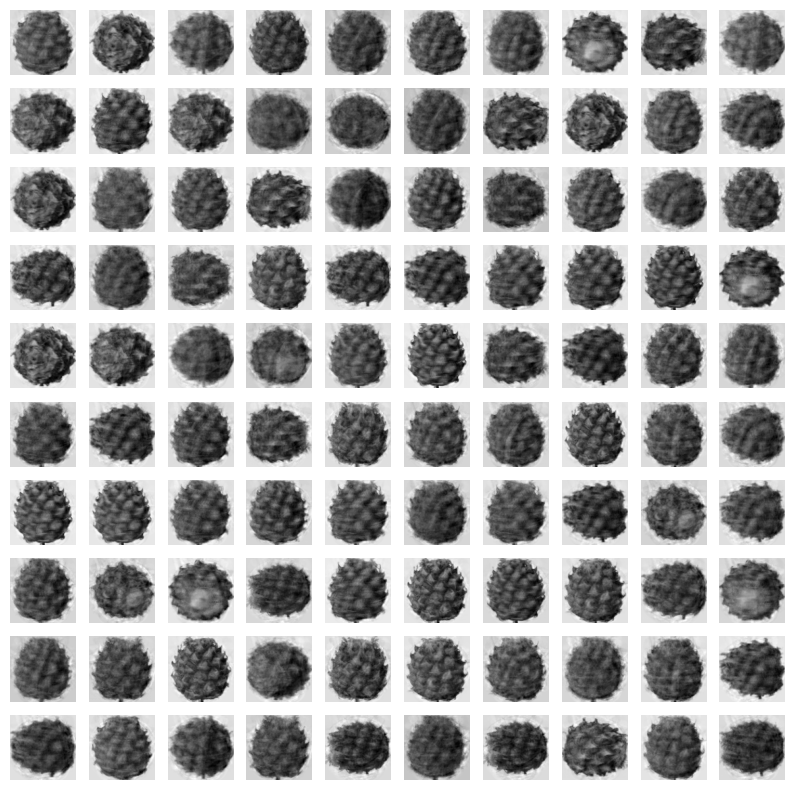

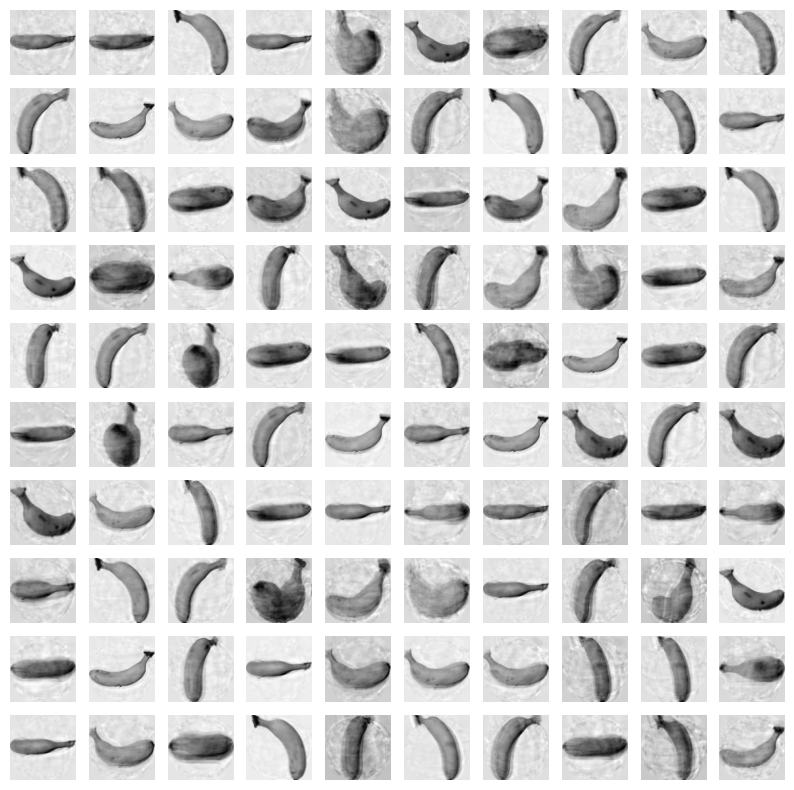

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for i in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[i:i+100])
    print('\n')

### 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 타나내는지 기록한 값을 설명된 분산이라고 합니다.


0.9215466499088749


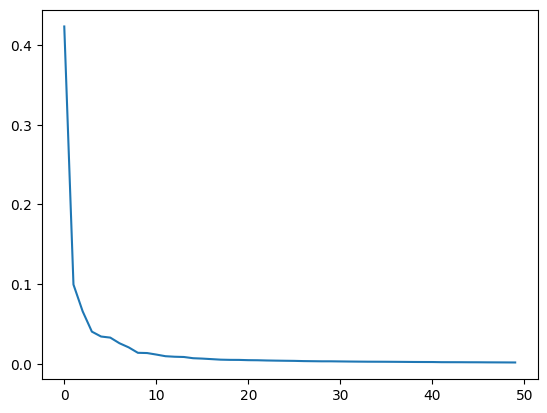

In [13]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 다른 알고리즘과 함께 사용하기


In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록됨


0.9966666666666667
0.848054838180542


In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.00847163200378418


pca로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있습니다.

또한 시각화하기 비교적 쉽습니다.

In [18]:
#n_component 매개변수에 주성분의 개수 대신 설명된 분산의 비율을 입려할 수도 있습니다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [19]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.01280226707458496


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

### 차원 축속된 데이터를 사용해 K-Means 알고리증으로 클러스터 찾기

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


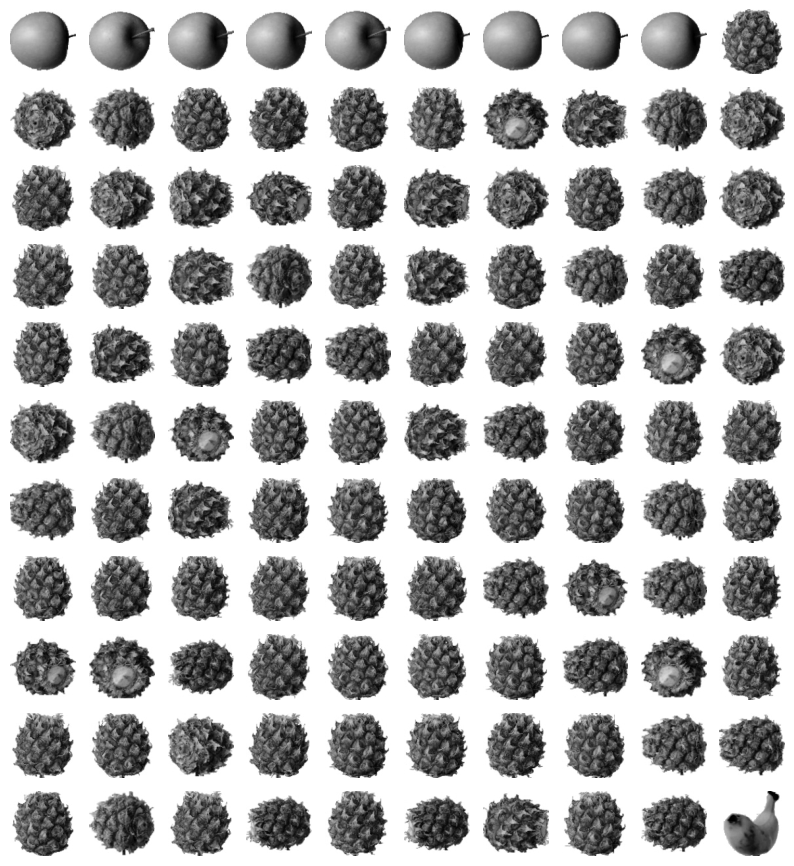

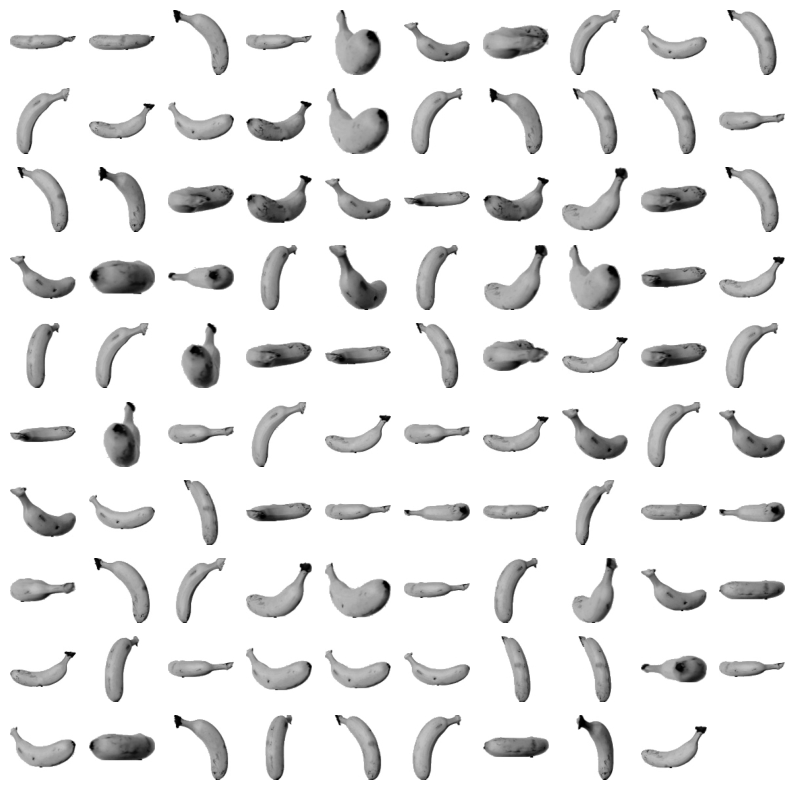

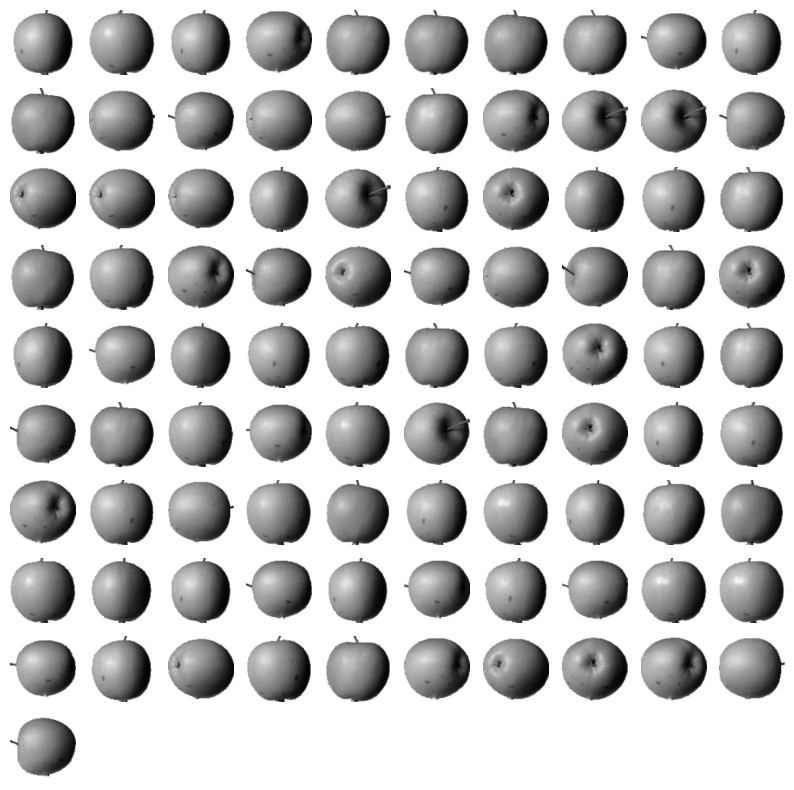

In [23]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_==[label]])
    print('\n')

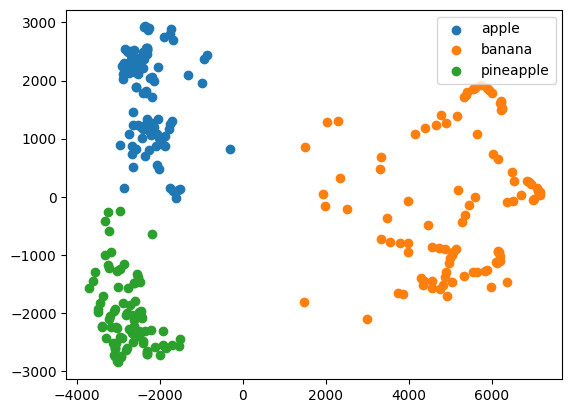

In [25]:
for label in range(0, 3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()